In [1]:
import yfinance as yf
import pandas as pd
import datetime
from prophet import Prophet
import plotly
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = yf.download("QQQ", start="2002-01-01", end="2022-12-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
df.reset_index(inplace=True)

In [4]:
# only keep columns 'Date' and 'Close'
df = df[['Date', 'Close']]

In [5]:
# rename columns
df.columns = ['ds', 'y']

In [6]:
# train model
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

In [7]:
# forecast
future = m.make_future_dataframe(periods=365, freq='D')  # where the frequency is one day
forecast = m.predict(future)

In [8]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2002-01-02,37.781814,-4.780926,66.765540,37.781814,37.781814,-5.656993,-5.656993,-5.656993,-8.986855,...,-0.382768,-0.382768,-0.382768,3.712630,3.712630,3.712630,0.0,0.0,0.0,32.124821
1,2002-01-03,37.783961,-1.799159,67.165382,37.783961,37.783961,-5.609890,-5.609890,-5.609890,-8.986855,...,-0.339988,-0.339988,-0.339988,3.716953,3.716953,3.716953,0.0,0.0,0.0,32.174071
2,2002-01-04,37.786107,-4.514462,69.009139,37.786107,37.786107,-5.882920,-5.882920,-5.882920,-8.986855,...,-0.609472,-0.609472,-0.609472,3.713408,3.713408,3.713408,0.0,0.0,0.0,31.903188
3,2002-01-07,37.792547,-3.339835,70.666369,37.792547,37.792547,-5.815530,-5.815530,-5.815530,-8.986855,...,-0.474381,-0.474381,-0.474381,3.645707,3.645707,3.645707,0.0,0.0,0.0,31.977017
4,2002-01-08,37.794694,-3.881157,67.127402,37.794694,37.794694,-5.825151,-5.825151,-5.825151,-8.986855,...,-0.440104,-0.440104,-0.440104,3.601809,3.601809,3.601809,0.0,0.0,0.0,31.969543


In [9]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5626,2023-11-26,426.170770,385.162978,457.572769,421.326880,431.035397,-7.291658,-7.291658,-7.291658,-8.986855,...,1.123357,1.123357,1.123357,0.571840,0.571840,0.571840,0.0,0.0,0.0,418.879112
5627,2023-11-27,426.301398,381.762424,455.954176,421.439695,431.186802,-8.662181,-8.662181,-8.662181,-8.986855,...,-0.474381,-0.474381,-0.474381,0.799056,0.799056,0.799056,0.0,0.0,0.0,417.639217
5628,2023-11-28,426.432025,382.884144,453.223204,421.552496,431.340180,-8.400849,-8.400849,-8.400849,-8.986855,...,-0.440104,-0.440104,-0.440104,1.026111,1.026111,1.026111,0.0,0.0,0.0,418.031177
5629,2023-11-29,426.562653,381.437000,454.868375,421.665296,431.531798,-8.119059,-8.119059,-8.119059,-8.986855,...,-0.382768,-0.382768,-0.382768,1.250564,1.250564,1.250564,0.0,0.0,0.0,418.443594
5630,2023-11-30,426.693281,382.475337,456.960453,421.778096,431.702415,-7.856770,-7.856770,-7.856770,-8.986855,...,-0.339988,-0.339988,-0.339988,1.470072,1.470072,1.470072,0.0,0.0,0.0,418.836510


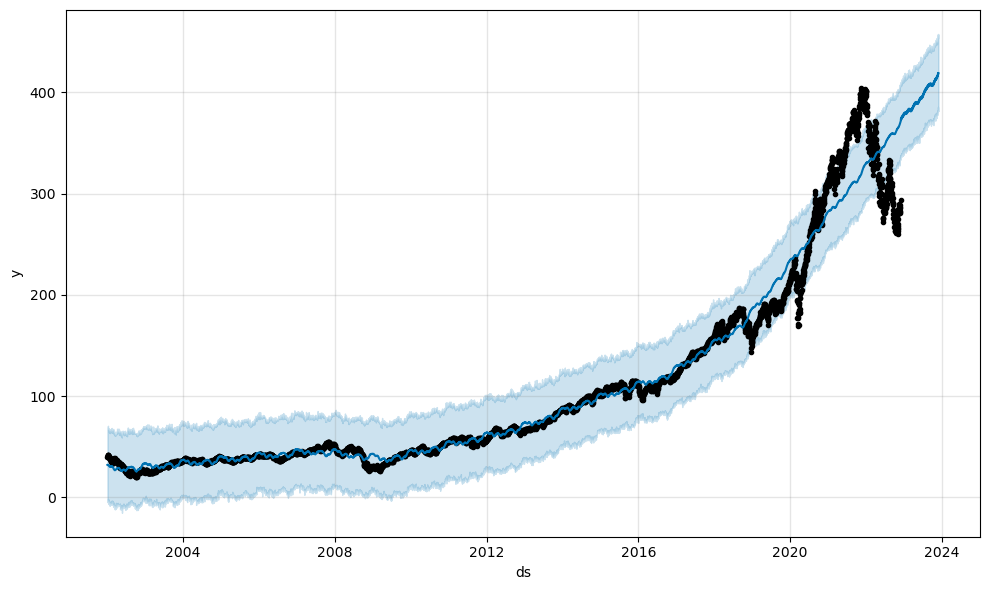

In [10]:
plot1 = m.plot(forecast)

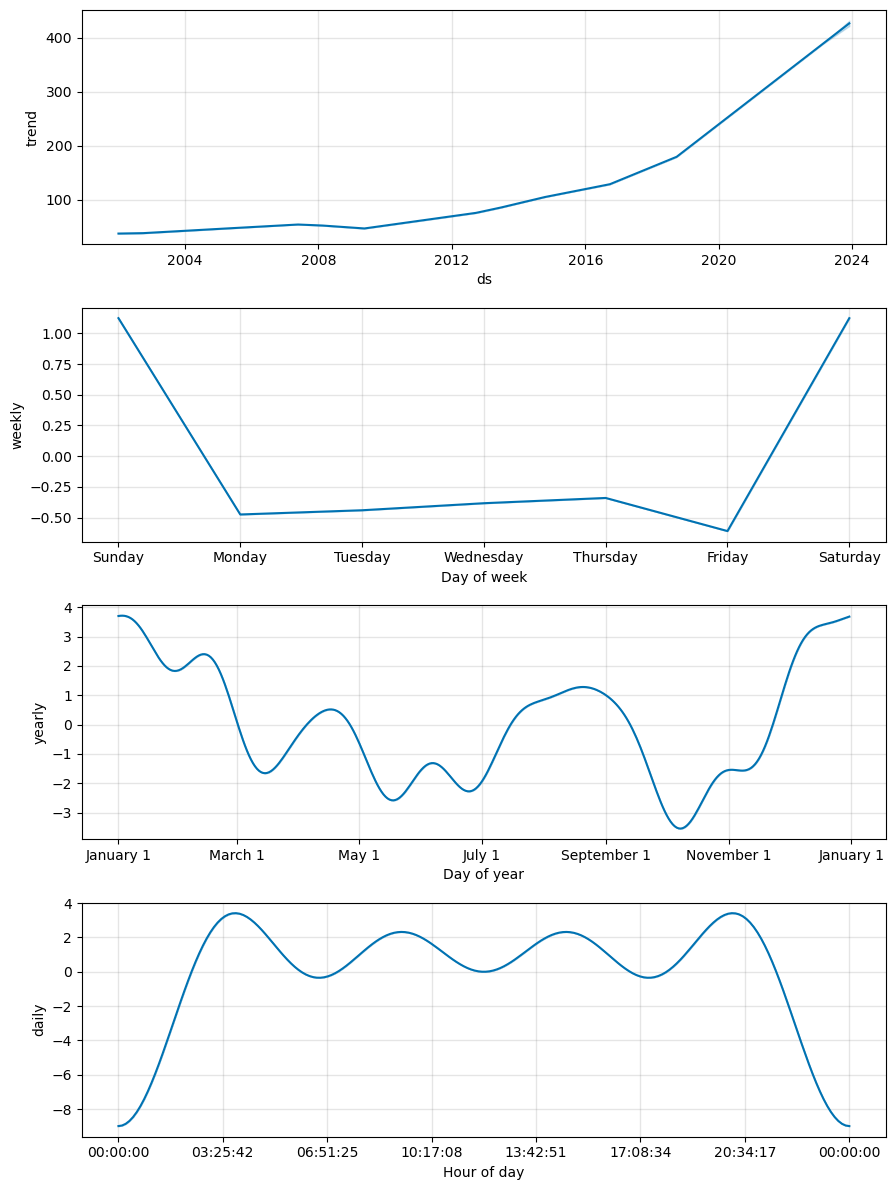

In [11]:
plot2 = m.plot_components(forecast)